Imports + Load Data

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/reviews_processed.csv")
df.head()


Index(['review_id', 'review_text', 'rating', 'review_date', 'review_year',
       'review_month', 'bank_code', 'bank_name', 'user_name', 'thumbs_up',
       'text_length', 'source'],
      dtype='object')

Initialize VADER

In [7]:
analyzer = SentimentIntensityAnalyzer()


Compute Sentiment for Each Review

In [15]:
def get_vader_sentiment(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return pd.Series(["neutral", 0])

    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]

    if compound >= 0.05:
        label = "positive"
    elif compound <= -0.05:
        label = "negative"
    else:
        label = "neutral"

    return pd.Series([label, compound])



df[["sentiment_label", "sentiment_score"]] = df["review_text"].apply(get_vader_sentiment)
df.head()


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label,sentiment_score
0,3463230e-f9f7-4be3-a632-fdd8d017ce84,🙏👍,5,2025-11-29,2025,11,BOA,Abyssinia Bank,Yasin Alemu,0,2,Google Play,neutral,0.0000
1,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,BOA,Abyssinia Bank,Wariyo Dida,0,9,Google Play,positive,0.4927
2,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,BOA,Abyssinia Bank,Hailegebrail Tegegn,0,4,Google Play,neutral,0.0000
3,11306fb9-5571-4950-8d32-604c5402242f,good!,5,2025-11-28,2025,11,BOA,Abyssinia Bank,Tsegay ab,0,5,Google Play,positive,0.4926
4,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,BOA,Abyssinia Bank,Yohanis Fikadu,0,8,Google Play,positive,0.4404


Save Sentiment Results

In [17]:
df.to_csv("../data/sentiment/sentiment_scores.csv", index=False)
df.head()


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label,sentiment_score
0,3463230e-f9f7-4be3-a632-fdd8d017ce84,🙏👍,5,2025-11-29,2025,11,BOA,Abyssinia Bank,Yasin Alemu,0,2,Google Play,neutral,0.0000
1,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,BOA,Abyssinia Bank,Wariyo Dida,0,9,Google Play,positive,0.4927
2,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,BOA,Abyssinia Bank,Hailegebrail Tegegn,0,4,Google Play,neutral,0.0000
3,11306fb9-5571-4950-8d32-604c5402242f,good!,5,2025-11-28,2025,11,BOA,Abyssinia Bank,Tsegay ab,0,5,Google Play,positive,0.4926
4,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,BOA,Abyssinia Bank,Yohanis Fikadu,0,8,Google Play,positive,0.4404


Sentiment Summary Per Bank

In [19]:
df.groupby("bank_code")["sentiment_score"].mean()


bank_code
BOA       0.153618
CBE       0.274236
Dashen    0.311204
Name: sentiment_score, dtype: float64

Plot Sentiment Score Distribution

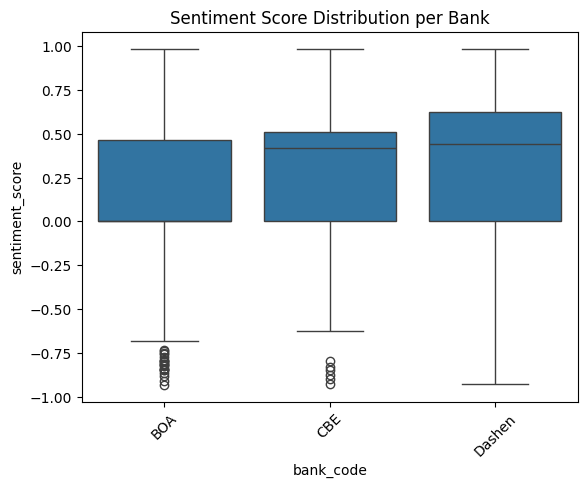

In [22]:
sns.boxplot(data=df, x="bank_code", y="sentiment_score")
plt.title("Sentiment Score Distribution per Bank")
plt.xticks(rotation=45)
plt.show()
